In [27]:
#import useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')

In [28]:
#load the data
df = pd.read_csv("data/instagram_reach.csv")
df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [29]:
# checking and analyzing the data
df.shape

(100, 8)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


In [31]:
df.isnull().sum()

Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [32]:
#remove unwanted data
df.drop(columns='Unnamed: 0',inplace=True)

In [33]:
#check for duplicate data
df.duplicated().sum()

0

In [34]:
#chnage time column into integer
df['Time since posted'].unique()
df['Time since posted'] = df['Time since posted'].str.replace('hours','').astype('int64')

In [35]:
df['USERNAME'].unique()

array(['mikequindazzi', 'drgorillapaints', 'aitrading_official',
       'opensourcedworkplace', 'crea.vision', 'be.masterly',
       'lenovoworkstations', 'kirellb', 'ethicsandai',
       'diworksolucionesdeti', 'databowl', 'edwisor_india', 'ubiqum',
       'artificialintelligence.a.i', 'ansonmccade', 'jennifercodes',
       'eligible.api', 'ale_borba', 'amjstaffing', 'writtorg',
       'superdatascience', 'xotivtechnologies', 'onthetopsearch',
       'data_enthusiast', 'programmer.io', 'coding.is.life', 'theminest_',
       'philosophercoin', 'greenhousegroup', 'neondistrictrpg',
       'blocsidesports', 'cryptocrackhead', 'gsmusicgroupllc',
       'iotatokennews', 'bitpainting', '_linda_smith567', 'litebit.eu',
       'meganbloemsma', 'ricmiqads', 'hollympeck', 'artificial_quotes',
       'interwall', 'entrancegmbh', 'usccareercenter', '_ehab.othman_',
       'anki7singh', 'mbnsolutions', 'triatebr', 'orcan_intel',
       'funnelaico', 'iamalexleyva', 'astrokpj', 'big.data.hush',
   

In [36]:
df = df.dropna()

#### Analysis for features

In [37]:
## Define which columns should be ordinal-encoded and which should be scaled

categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(exclude='object').columns
numerical_data = df[['S.No','Followers','Time since posted','Likes']]
categorical_data = df[['USERNAME','Caption','Hashtags']]

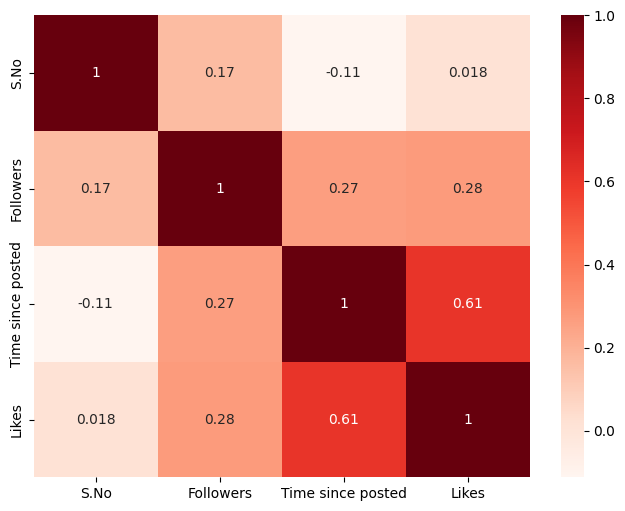

In [38]:
## numerical data correlation

plt.figure(figsize=(8,6))
cor = numerical_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

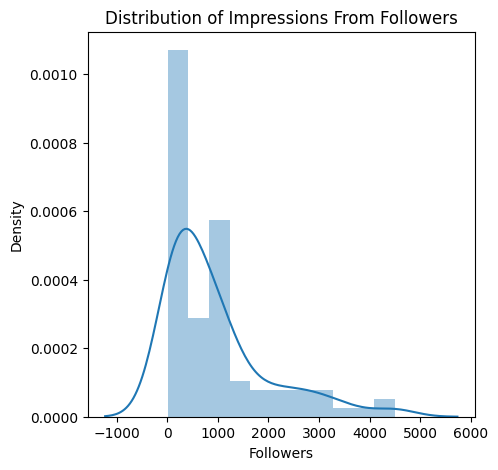

In [39]:
## Distribution of Impressions From Followers
plt.figure(figsize=(5,5))
plt.title("Distribution of Impressions From Followers")
sns.distplot(df['Followers'])
plt.show()

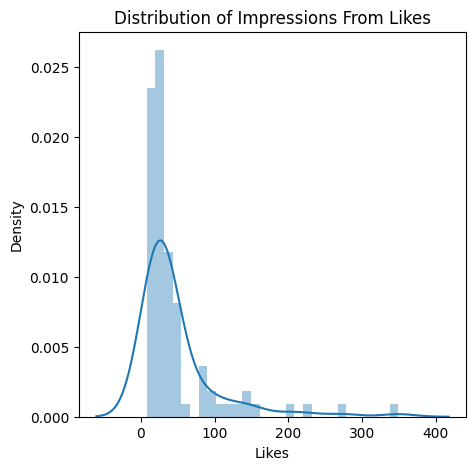

In [40]:
## Distribution of Impressions From Likes
plt.figure(figsize=(5,5))
plt.title("Distribution of Impressions From Likes")
sns.distplot(df['Likes'])
plt.show()

In [41]:
## Relation between Likes and Followers

followers = df["Followers"].sum()
likes = df["Likes"].sum()

labels = ['Followers', 'Likes']
values = [followers, likes]

fig = px.pie(df, values=values, names=labels, 
             title='Impressions on Instagram Posts From Various Sources', hole=0.5)
fig.show()

<Axes: >

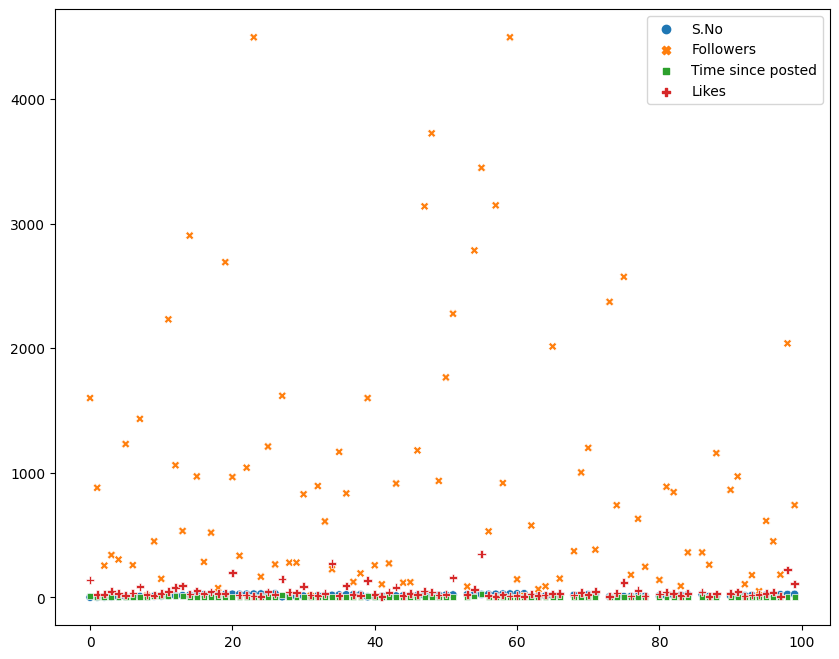

In [42]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df)

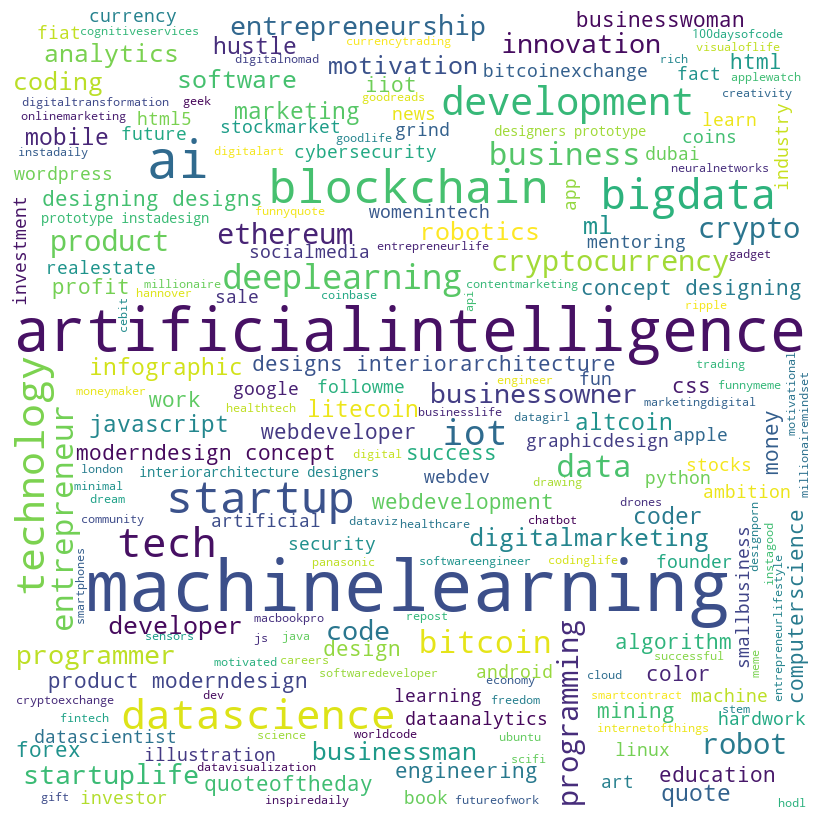

In [43]:
# catagorical data analysis
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.Hashtags:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

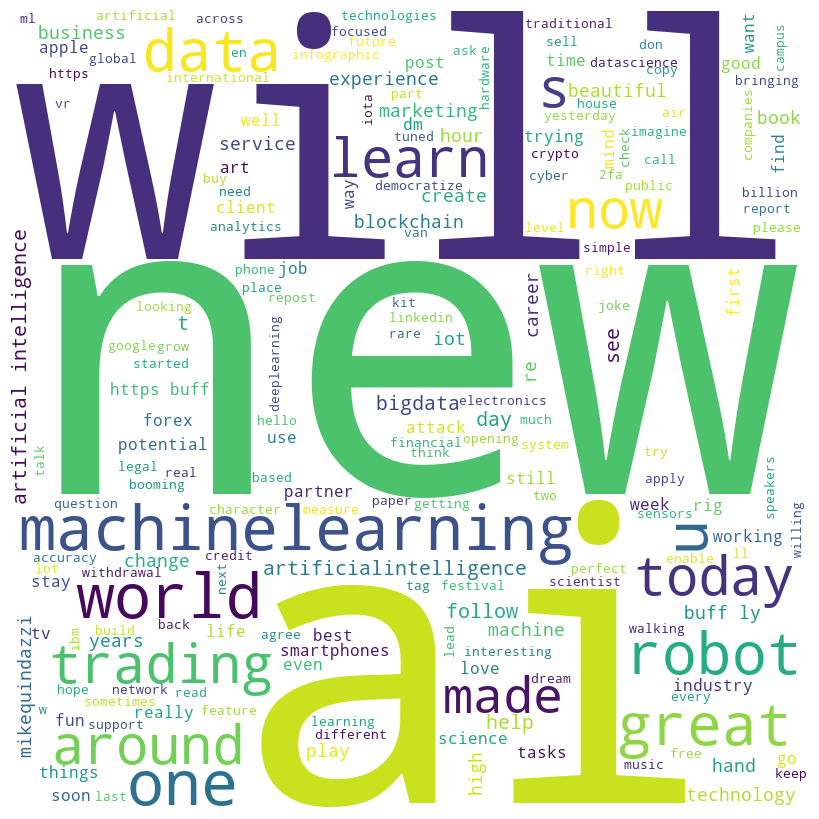

In [44]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.Caption:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

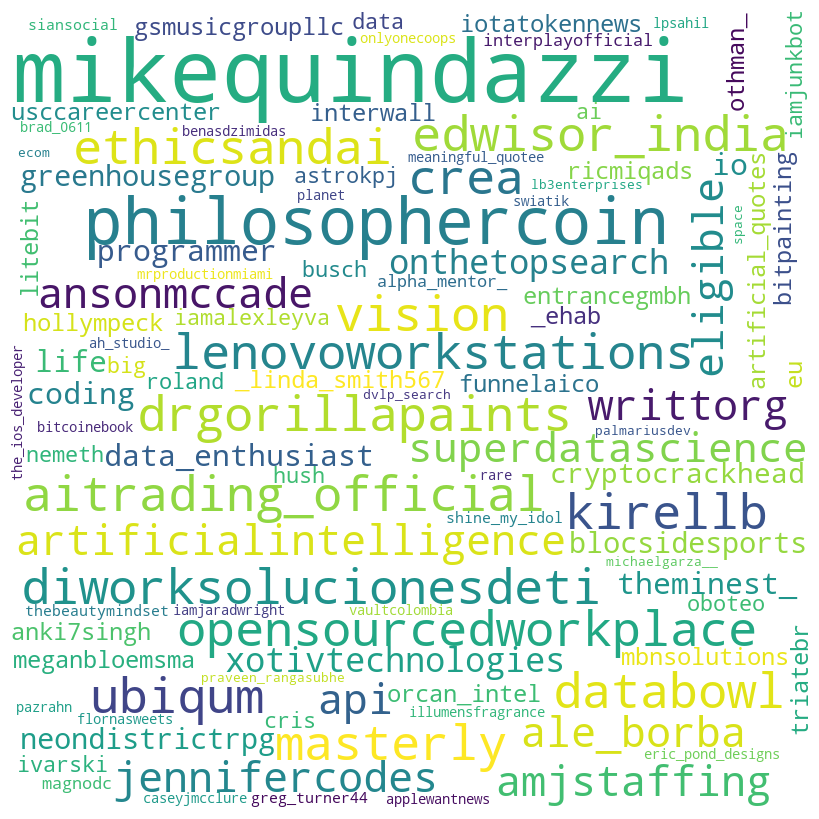

In [45]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.USERNAME:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [46]:
df.to_csv("preprocessed_data.csv")

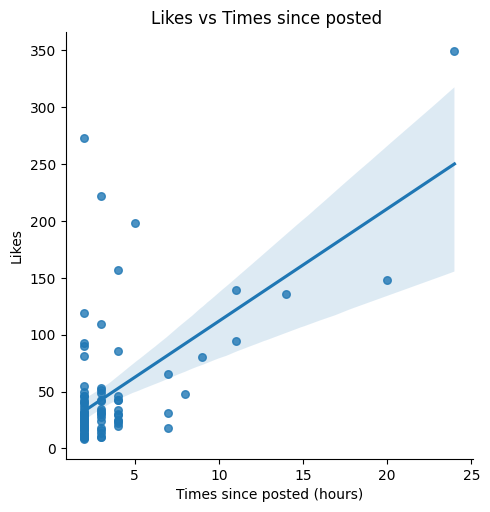

In [49]:
sns.lmplot(x='Time since posted', y='Likes', data=df, fit_reg=True, scatter_kws={"marker": "D", "s": 30})

plt.title('Likes vs Times since posted ')
plt.xlabel('Times since posted (hours)')
plt.ylabel('Likes')
plt.show()

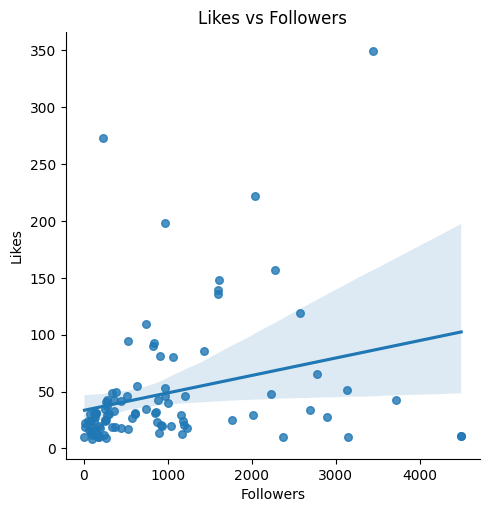

In [50]:
sns.lmplot(x='Followers', y='Likes', data=df, fit_reg=True, scatter_kws={"marker": "D", "s": 30})

plt.title('Likes vs Followers')
plt.xlabel('Followers')
plt.ylabel('Likes')
plt.show()